In [154]:
import pandas as pd

with open('ev3_SampleData.csv') as f:
#     print(f.read())
    f.read()

df = pd.read_csv('ev3_SampleData.csv', index_col=0, header=0)

print(type(df))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
    color  turn      p         i       d
id                                      
1      21    -9 -0.324 -0.001050 -9.1125
2      21     0 -0.324 -0.003149  0.0000
3      21     0 -0.324 -0.005249  0.0000
4      21     0 -0.324 -0.007348  0.0000
5      21     0 -0.324 -0.009448  0.0000


In [155]:
# 4msごとにcolorを取得しているので、
# 4msごとのcolorの値を見るためのDataFrameを作成

df_color_4ms = pd.DataFrame({
    'time' : range(0, len(df)*4, 4),
    'color' : df.iloc[:, 0]
})
print(df_color_4ms.head())

    time  color
id             
1      0     21
2      4     21
3      8     21
4     12     21
5     16     21


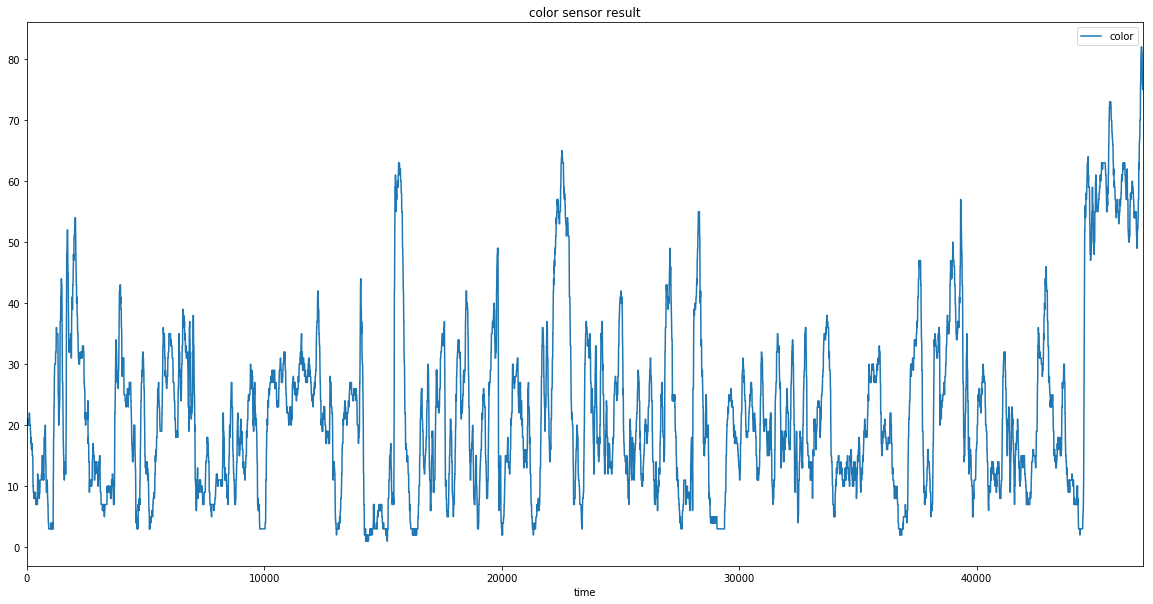

In [156]:
df_color_4ms.plot.line(
    x = 'time',
    y = 'color',
    figsize = (20, 10),
    title = 'color sensor result'
)

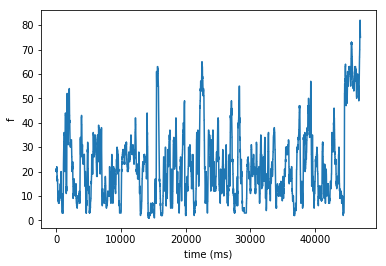

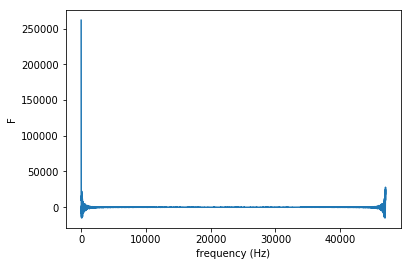

In [167]:
from scipy import fftpack
from scipy.fftpack import fftfreq
import numpy as np
import matplotlib.pyplot as plt

# 参考: https://org-technology.com/posts/smoother.html

# 時系列のサンプルデータ作成
# N = len(f)                         # データ数
dt = 0.000001                       # サンプリング間隔
t = range(0, len(df)*4, 4)

f = np.array(df_color_4ms.iloc[:, 1].values.flatten())
N = len(f)                         # データ数

F = fftpack.fft(f)
freq = fftpack.fftfreq(N, dt)

# print(type(f))
# print(type(F))

# プロット
# 時系列データ
plt.figure(1)
plt.plot(t, f)
plt.xlabel("time (ms)")
plt.ylabel("f")

# 離散フーリエ変換の結果
plt.figure(2)
plt.plot(t, F)
# plt.xlim(0, 1)
plt.xlabel("frequency (Hz)")
plt.ylabel("F")

plt.show()

In [168]:
# カットオフ周波数[Hz]
fs = 1000
F2 = np.copy(F)
F2[(freq > fs)] = 0
F2[(freq < 0)] = 0

# 逆 FFT 処理
f2 = np.real(fftpack.ifft(F2) * N)

Text(0, 0.5, 'f2')

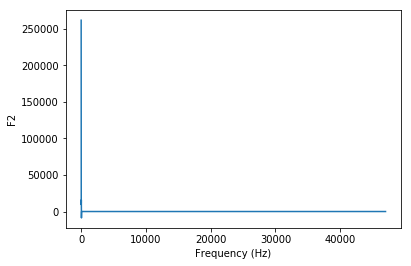

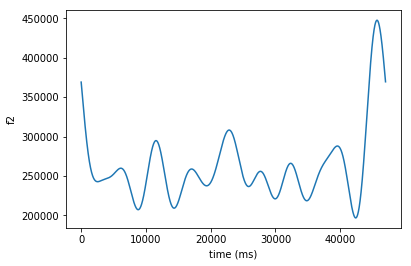

In [169]:
# プロット
# 時系列データ
plt.figure(1)
plt.plot(t, F2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("F2")

# 逆離散フーリエ変換の結果
plt.figure(2)
plt.plot(t, f2)
plt.xlabel("time (ms)")
plt.ylabel("f2")

In [ ]:
plt.figure(1)
plt.plot(t)